In [1]:
import re
import os
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.datasets import  load_files
from nltk.corpus import stopwords
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r'data/spambase.data', names=[x for x in range(58)])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
data = data.fillna(data.mean())

In [4]:
X = data.iloc[:,:54]
y = data[57]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape, X_test.shape

((3220, 54), (1381, 54))

# LogisticRegression

In [32]:
reg = LogisticRegression(max_iter = 123)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

C:\Users\dimax\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
print('Test set score: {:.4f}'.format(reg.score(X_test, y_test)))

Test set score: 0.9218


In [31]:
print(reg.intercept_)

[-1.13684128]


# SVM

In [23]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [('model', SVC())]
svm_pipe = Pipeline(steps)

In [24]:
grid_params = { 'model__kernel' : ['linear','rbf', 'poly','sigmoid'],
               'model__C' : [1,10,100],
               'model__random_state' : [42],
}
classifier_svm = GridSearchCV(svm_pipe, grid_params, cv = 3)
classifier_svm = classifier_svm.fit(X_train, y_train.ravel())
print(classifier_svm.best_params_)

{'model__C': 10, 'model__kernel': 'rbf', 'model__random_state': 42}


In [25]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train*100)
y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test*100)

Training set:  94.5031055900621
Test set:  92.90369297610427


In [26]:
print('Model accuracy score with hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm_test)))

Model accuracy score with hyperparameters: 0.9290


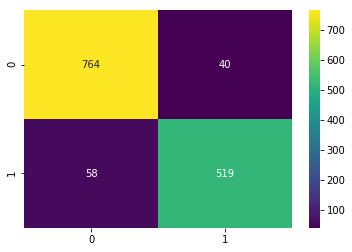

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       804
           1       0.93      0.90      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_svm_test))